In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

# 1. Load the dataset into python environment

In [279]:
#load the dataset into a variable
data=pd.read_csv("titanic_dataset.csv")

In [280]:
#checking the head of dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column

In [281]:
#setting‘PassengerId’ as the index column
data.set_index('PassengerId', inplace=True)
data


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 3. Check the basic details of the dataset

In [282]:
#checking the shape of dataset
data.shape

(891, 11)

In [283]:
#checking data info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [284]:
# Check the number of null values in each column
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# 4. Fill in all the missing values present in all the columns in the dataset

In [285]:
#checking dtypes
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [286]:
data.isnull().mean() * 100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

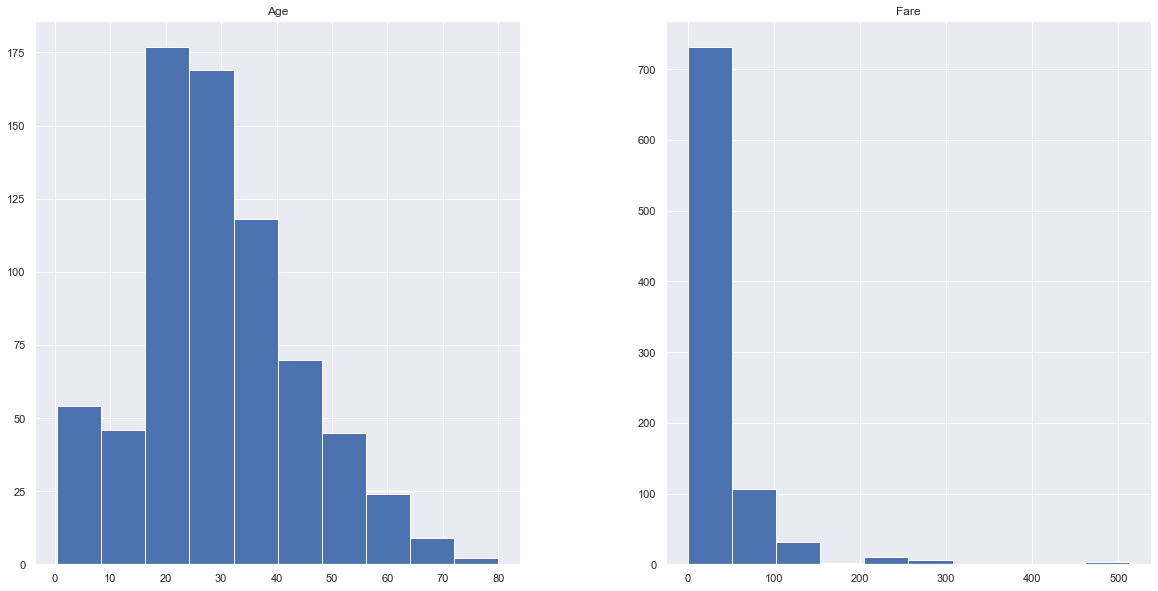

In [287]:
#Check the visualizations for float datatype columns
graph=data.select_dtypes(include=["float"])
graph.hist(figsize=(20,10))
plt.show()

# Filling missing values for 'Age'

In [288]:
#print the columns for easily accessing their names.
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

C:\Users\The.Maqtron\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


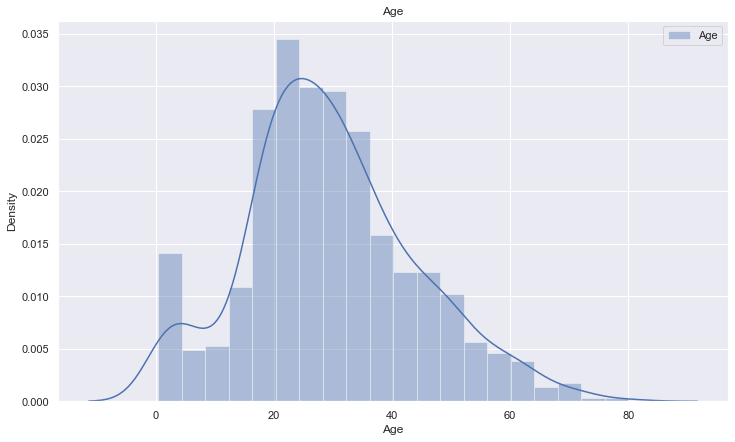

In [289]:
# Plot histogram in proper format
plt.figure(figsize=(12,7)) # figure ration 12:7
sns.set() # for style
 
sns.distplot(data['Age'],label='Age',)
 
plt.title('Age') # for histogram title
plt.legend() # for label

In [290]:
#filling the missing values in age with respect to the median of it.
data["Age"]=data["Age"].fillna(data["Age"].median())
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

C:\Users\The.Maqtron\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


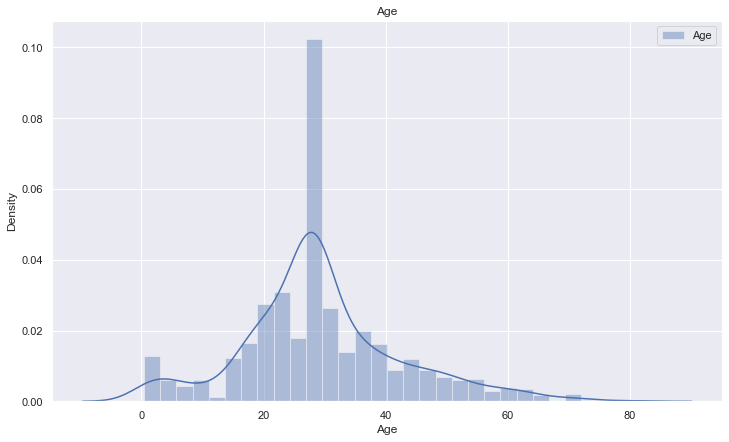

In [291]:
# Plot histogram in proper format
plt.figure(figsize=(12,7)) # figure ration 12:7
sns.set() # for style
 
sns.distplot(data['Age'],label='Age',)
 
plt.title('Age') # for histogram title
plt.legend() # for label

In [292]:
#checking the data info after filling the age column.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [293]:
#from the info we know that almost 10 columns filled and we've to fill only 2 columns and they're Cabin & Embarked 

# Filling missing values for 'Cabin'

In [294]:
data.isnull().mean() * 100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age          0.000000
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [295]:
#from the mean we we understood that the cabin data is 77% is null value 
#so we can say that this column which doesn't contribute to the alogorithm to predict the missing values accurately.
#So we've to drop the column

In [296]:
data = data.drop(labels = ["Cabin"], axis=1)

In [297]:
# Check if 'Cabin' column is still there or not.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


# Filling missing data for "Embarked"

In [298]:
#we're creating a crosstab to the "Embarked" into variable "Embarked_data"
#checking the rows which have missing values for embarking points.
Embarked_null_data=data[data["Embarked"].isnull()]
Embarked_null_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [299]:
# Here we can see that in "Embarked" there's 2 values missing in the index "61"&"829"
#so we've to check the Embarked columns by ploting which embarkd value is greatest and filled with it.

In [300]:
data.groupby('Embarked').size()


Embarked
C    168
Q     77
S    644
dtype: int64

In [301]:
Embarked_data=data.groupby('Embarked').size()

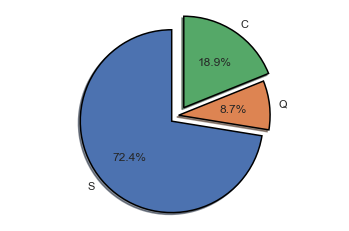

In [302]:
# the slices are ordered and
# plotted counter-clockwise:
Embarked_data= ["S","Q","C"]
    
stock = [644,77,168]
explode = (0.1, 0, 0.1) 
  
plt.pie(stock, explode = explode,
        labels = Embarked_data, autopct = '%1.1f%%',
        shadow = True, startangle = 90,
        wedgeprops= {"edgecolor":"black",
                     'linewidth': 1.5,
                     'antialiased': True})
  
# Equal aspect ratio ensures that
# pie is drawn as a circle.
plt.axis('equal')  
  
plt.show()

In [303]:
#Embarked implies where the traveler mounted from. 
#There are three possible values for Embark — Southampton, Cherbourg, and Queenstown.
#More than 72.4% of the people boarded from Southampton. 
#Just under 18.9% boarded from Cherbourg and the rest boarded from Queenstown. 
#People who boarded from Cherbourg had a higher chance of survival than people who boarded from Southampton or Queenstown.

# Data Imputation

In [304]:
#Data imputation is the practice of replacing missing data with some substituted values. 
#There can be a multitude of substitution processes that can be used. I used some of them for the missing values.

In [305]:
data.Embarked.fillna(data.Embarked.mode()[0], inplace = True)


In [306]:
#checking info after Data Imputation
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


# 5. Check and handle outliers in at least 3 columns in the dataset

# »Fare

In [307]:
data.Fare.nunique()

248

Text(0.5, 1.0, 'boxplot of Fare')

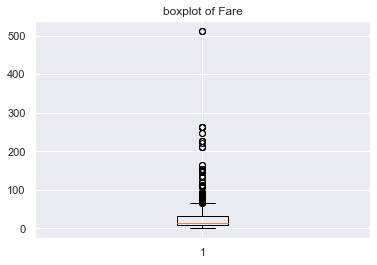

In [308]:
plt.boxplot(data["Fare"])
plt.title("boxplot of Fare")

In [309]:
Q1=np.percentile(data["Fare"],25,interpolation= "midpoint")
Q2=np.percentile(data["Fare"],50,interpolation= "midpoint")
Q3=np.percentile(data["Fare"],75,interpolation= "midpoint")
print("value of Q1:",Q1)
print("value of Q2:",Q2)
print("value of Q3:",Q3)

value of Q1: 7.9104
value of Q2: 14.4542
value of Q3: 31.0


In [310]:
data["Fare"].median()

14.4542

In [311]:
IQR= Q3-Q1

In [312]:
Upper_lim= Q3+1.5*IQR
Lower_lim=Q1-1.5*IQR
print("Upper limit value is:",Upper_lim)
print("Lower limit value is:",Lower_lim)

Upper limit value is: 65.6344
Lower limit value is: -26.724


In [313]:
outlier=[]
for x in data["Fare"]:
    if((x>Upper_lim)or(x<Lower_lim)):
        outlier.append(x)


In [314]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

# There are lot of outliers for the "fare" column and its distribution is not normal and heavily right skewed.

C:\Users\The.Maqtron\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


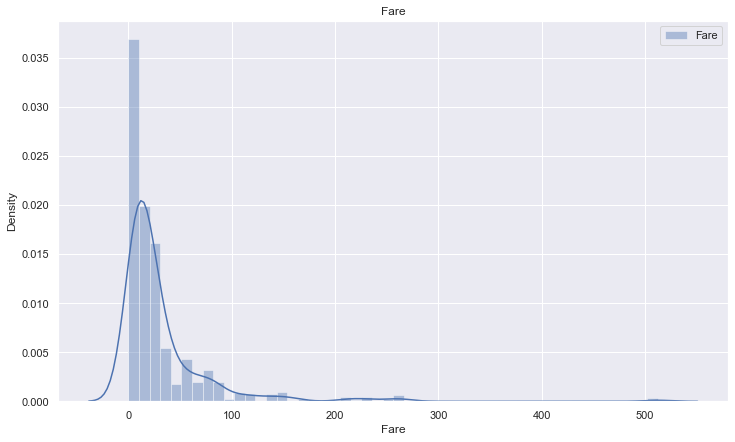

In [315]:
# Plot histogram in prper format
plt.figure(figsize=(12,7)) # figure ration 12:7
sns.set() # for style
 
sns.distplot(data["Fare"],label="Fare")
 
plt.title("Fare") # for histogram title
plt.legend() # for label

In [316]:
# So we'll use a different approach to detect the outliers by using 30 percentile increments instead of quartiles
Q1=np.percentile(data["Fare"],30,interpolation= "midpoint")
Q2=np.percentile(data["Fare"],60,interpolation= "midpoint")
Q3=np.percentile(data["Fare"],90,interpolation= "midpoint")
print("value of Q1:",Q1)
print("value of Q2:",Q2)
print("value of Q3:",Q3)

value of Q1: 8.05
value of Q2: 21.6792
value of Q3: 77.9583


In [317]:
IQR= Q3-Q1
Upper_lim= Q3+1.5*IQR
Lower_lim=Q1-1.5*IQR
print("Upper limit value is:",Upper_lim)
print("Lower limit value is:",Lower_lim)

Upper limit value is: 182.82074999999998
Lower limit value is: -96.81245


In [318]:
ind_val=data["Fare"]>Upper_lim
data.loc[ind_val].index

Int64Index([ 28,  89, 119, 259, 300, 312, 342, 378, 381, 439, 528, 558, 680,
            690, 701, 717, 731, 738, 743, 780],
           dtype='int64', name='PassengerId')

Text(0.5, 1.0, 'fare - box plot')

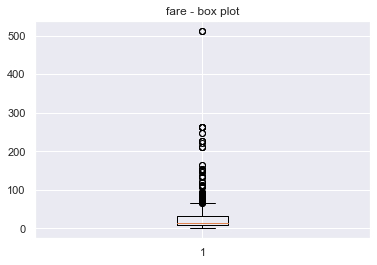

In [319]:
#plotting fare before dropping
plt.boxplot(data['Fare'])
plt.title('fare - box plot')

In [320]:
data.drop([ 28,  89, 119, 259, 300, 312, 342, 378, 381, 439, 528, 558, 680,
            690, 701, 717, 731, 738, 743, 780],inplace=True)

Text(0.5, 1.0, 'fare - box plot')

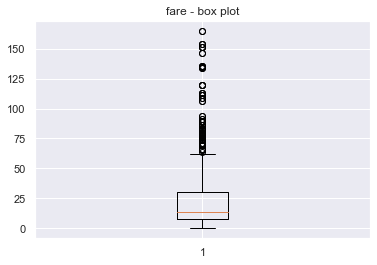

In [321]:
#plotting fare after dropping
plt.boxplot(data['Fare'])
plt.title('fare - box plot')

# »Parch

In [322]:
data.Parch.nunique()

7

C:\Users\The.Maqtron\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


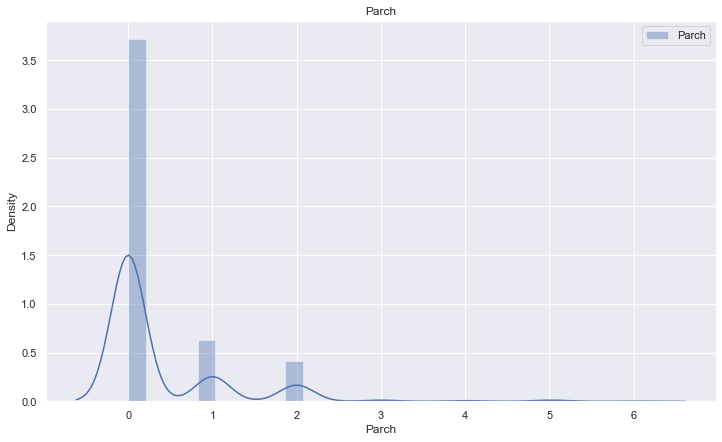

In [323]:
# Plot histogram in proper format
plt.figure(figsize=(12,7)) # figure ration 12:7
sns.set() # for style
 
sns.distplot(data["Parch"],label="Parch")
 
plt.title("Parch") # for histogram title
plt.legend() # for label

In [324]:
# So we'll use a different approach to detect the outliers by using 30 percentile increments instead of quartiles
Q1_Parch = np.percentile(data['Parch'],28,interpolation='midpoint')
Q2_Parch = np.percentile(data['Parch'],56,interpolation='midpoint')
Q3_Parch = np.percentile(data['Parch'],79,interpolation='midpoint')
IQR_Parch = Q3_Parch - Q1_Parch
LowLim_Parch = Q1_Parch - 1.5*IQR_Parch
HighLim_Parch = Q3_Parch + 1.5*IQR_Parch

In [325]:
print("IQR_Parch value is:",IQR_Parch)
print("LowLim_Parch value is:",LowLim_Parch)
print("HighLim_Parch value is:",HighLim_Parch)

IQR_Parch value is: 1.0
LowLim_Parch value is: -1.5
HighLim_Parch value is: 2.5


In [326]:
ind_outlier_parch = []
ind_outlier_Parch = data['Parch'] > High_Lim_Parch
data.loc[ind_outlier_Parch].index

Int64Index([14, 26, 87, 168, 361, 438, 568, 611, 639, 679, 737, 775, 859, 886], dtype='int64', name='PassengerId')

In [327]:
#dropping given indexes
data.drop([ 14, 26, 87, 168, 361, 438, 568, 611, 639, 679, 737, 775, 859, 886],inplace=True)

In [328]:
#checking data after dropping, for confirming
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  857 non-null    int64  
 1   Pclass    857 non-null    int64  
 2   Name      857 non-null    object 
 3   Sex       857 non-null    object 
 4   Age       857 non-null    float64
 5   SibSp     857 non-null    int64  
 6   Parch     857 non-null    int64  
 7   Ticket    857 non-null    object 
 8   Fare      857 non-null    float64
 9   Embarked  857 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 73.6+ KB


In [329]:
#so from data.info() we can clearly say that our data is fully checked and handled the outliers in it. 

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [330]:
scaling_data= data[['Pclass','Age','SibSp','Parch','Fare']].copy()
from sklearn import preprocessing

In [331]:
min_max_scaling = preprocessing.MinMaxScaler(feature_range=(0,1))

In [332]:
min_max_scaling_data = min_max_scaling.fit_transform(scaling_data)

mm_scale_titatic_Data = pd.DataFrame(min_max_scaling_data, index=scaling_data.index, columns=scaling_data.columns)

In [333]:
mm_scale_titatic_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 1 to 891
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  857 non-null    float64
 1   Age     857 non-null    float64
 2   SibSp   857 non-null    float64
 3   Parch   857 non-null    float64
 4   Fare    857 non-null    float64
dtypes: float64(5)
memory usage: 40.2 KB


In [334]:
mm_scale_titatic_Data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,857.000000,857.000000,857.000000,857.000000,857.000000
mean,0.665111,0.361660,0.064177,0.152275,0.160601
std,0.412122,0.163952,0.138448,0.310219,0.179366
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.271174,0.000000,0.000000,0.047892
50%,1.000000,0.346569,0.000000,0.000000,0.081379
75%,1.000000,0.434531,0.125000,0.000000,0.180146
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [335]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
x = mm_scale_titatic_Data
y = data['Survived']
X_train, X_test , y_train , y_test = train_test_split ( x, y , random_state=42, test_size = 0.05)
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)
predictions_rounded = np.round_(predictions)
MSE = mean_squared_error(y_test, predictions_rounded)
RSV = r2_score(y_test, predictions_rounded)

In [336]:
print("MSE value is :",MSE)
print("RSV Value is :",RSV)

MSE value is : 0.3023255813953488
RSV Value is : -0.2099567099567099


In [337]:
predictions_rounded

array([1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0.])

In [338]:
y.tail(43)

PassengerId
847    0
848    0
849    0
850    1
851    0
852    0
853    0
854    1
855    0
856    1
857    1
858    1
860    0
861    0
862    0
863    1
864    0
865    0
866    1
867    1
868    0
869    0
870    1
871    0
872    1
873    0
874    0
875    1
876    1
877    0
878    0
879    0
880    1
881    1
882    0
883    0
884    0
885    0
887    0
888    1
889    0
890    1
891    0
Name: Survived, dtype: int64

In [339]:
#submitted by Harikrishnan Bhuvanendran